<a href="https://colab.research.google.com/github/edycocon/LaboratoriosSeminarioProfesional1/blob/master/Laboratorio2_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
#plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

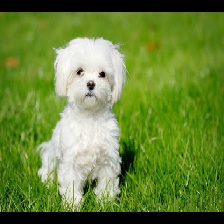

In [0]:
test_image = get_file('img.jpg','https://i.ytimg.com/vi/En5EoFkdCWk/hqdefault.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [0]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [0]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

154

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

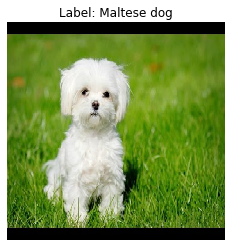

In [0]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['Batman','Guason']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'Batman')  
train_im_dir = os.path.join(train_dir, 'Guason')  
validation_ca_dir = os.path.join(validation_dir, 'Batman') 
validation_im_dir = os.path.join(validation_dir, 'Guason')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [85]:
queries = ['Dark','Bruce Wayne','cosplay','begins','wallpaper', 'cartoon']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='Batman '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=Batman Dark&source=lnms&tbm=isch
Total Time : 0:00:04.200619
Invalid image:  78.jpg cannot identify image file '/content/Images/78.jpg'
Invalid image:  41.jpg cannot identify image file '/content/Images/41.jpg'
Invalid image:  62.jpg cannot identify image file '/content/Images/62.jpg'
Invalid image:  93.jpg cannot identify image file '/content/Images/93.jpg'
https://www.google.co.in/search?q=Batman Bruce Wayne&source=lnms&tbm=isch
Total Time : 0:00:00.000350
Invalid image:  78.jpg cannot identify image file '/content/Images/78.jpg'
Invalid image:  41.jpg cannot identify image file '/content/Images/41.jpg'
Invalid image:  62.jpg cannot identify image file '/content/Images/62.jpg'
Invalid image:  93.jpg cannot identify image file '/content/Images/93.jpg'
https://www.google.co.in/search?q=Batman cosplay&source=lnms&tbm=isch
Total Time : 0:00:04.319504
Invalid image:  42.jpg cannot identify image file '/content/Images/42.jpg'
Invalid image:  55.jpg cannot 

In [87]:
queries = ['Heath Ledger','clown','joker','cartoon','wallpaper']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='Guason '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=Guason Heath Ledger&source=lnms&tbm=isch
Error  HTTPConnectionPool(host='www.diarioelectronico.com', port=80): Max retries exceeded with url: /wp-content/uploads/2018/05/guason.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f28efdc1908>: Failed to establish a new connection: [Errno 110] Connection timed out',))
Invalid image:  88.jpg cannot write mode P as JPEG
Invalid image:  46.jpg cannot write mode P as JPEG
Invalid image:  7.jpg cannot identify image file '/content/Images/7.jpg'
Invalid image:  34.jpg cannot write mode P as JPEG
Invalid image:  14.jpg cannot write mode P as JPEG
Invalid image:  31.jpg cannot write mode P as JPEG
Invalid image:  51.jpg cannot write mode P as JPEG
Invalid image:  95.jpg cannot write mode RGBA as JPEG
Invalid image:  71.jpg cannot write mode RGBA as JPEG
Invalid image:  87.jpg cannot write mode P as JPEG
Invalid image:  59.jpg cannot write mode RGBA as JPEG
Invalid image:  9.jpg can

In [88]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Batman images:', len(os.listdir(train_ca_dir)))
print('total training Guason images:', len(os.listdir(train_im_dir)))

print('total validation Batman images:', len(os.listdir(validation_ca_dir)))
print('total validation Guason images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Batman images: 495
total training Guason images: 392
total validation Batman images: 60
total validation Guason images: 52
--
Total training images: 887
Total validation images: 112


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [90]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 887 images belonging to 2 classes.


In [91]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 112 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [93]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [94]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['snorkel', 'harp', 'comic book', 'cuirass', 'military uniform',
       'ground beetle', 'mask', 'crash helmet', 'gasmask', 'totem pole',
       'comic book', 'gasmask', 'ski', 'totem pole', 'pickelhaube',
       'schipperke', 'backpack', 'comic book', 'bannister', 'comic book',
       'fountain', 'tusker', 'totem pole', 'digital clock',
       'crash helmet', 'pinwheel', 'neck brace', 'comic book', 'mask',
       'breastplate', 'streetcar', 'barbershop'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

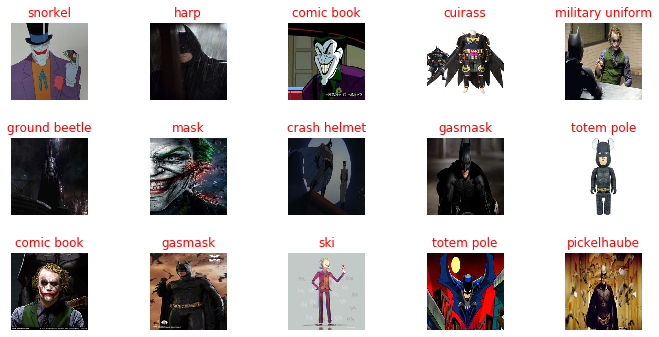

In [96]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [99]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [101]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


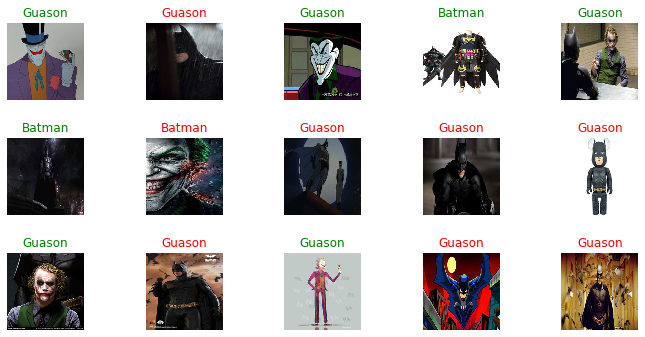

In [102]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 30s 6s/step - loss: 1.1979 - accuracy: 0.6687 - val_loss: 0.7528 - val_accuracy: 0.7589
Epoch 2/5
5/5 [==============================] - 27s 5s/step - loss: 0.5167 - accuracy: 0.8250 - val_loss: 0.3931 - val_accuracy: 0.9196
Epoch 3/5
5/5 [==============================] - 27s 5s/step - loss: 0.3020 - accuracy: 0.9125 - val_loss: 0.3142 - val_accuracy: 0.8929
Epoch 4/5
5/5 [==============================] - 26s 5s/step - loss: 0.1800 - accuracy: 0.9404 - val_loss: 0.2700 - val_accuracy: 0.9107
Epoch 5/5
5/5 [==============================] - 27s 5s/step - loss: 0.1103 - accuracy: 0.9625 - val_loss: 0.2363 - val_accuracy: 0.9375


## Check results

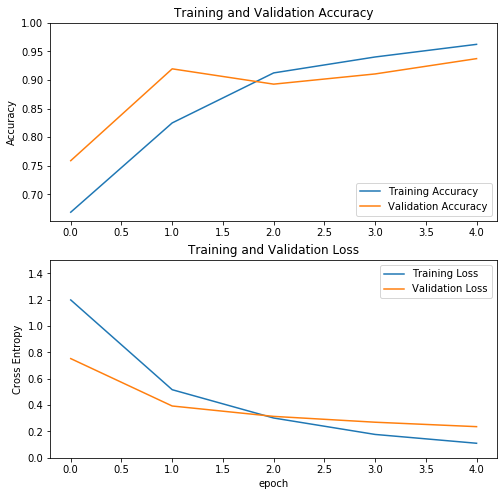

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

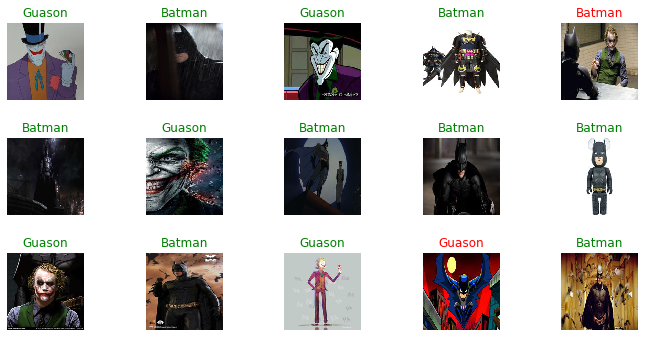

In [106]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [107]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

94674944/94668760 [==============================] - 3s 0us/step


In [0]:
base_model.trainable = False

In [111]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [112]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [117]:
history = model.fit(
    train_data_gen,
    epochs=10,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/10
5/5 [==============================] - 33s 7s/step - loss: 0.2781 - accuracy: 0.8875 - val_loss: 0.3290 - val_accuracy: 0.9196
Epoch 2/10
5/5 [==============================] - 31s 6s/step - loss: 0.1698 - accuracy: 0.9536 - val_loss: 0.2999 - val_accuracy: 0.9107
Epoch 3/10
5/5 [==============================] - 33s 7s/step - loss: 0.1063 - accuracy: 0.9688 - val_loss: 0.2893 - val_accuracy: 0.9107
Epoch 4/10
5/5 [==============================] - 33s 7s/step - loss: 0.1199 - accuracy: 0.9625 - val_loss: 0.2936 - val_accuracy: 0.9196
Epoch 5/10
5/5 [==============================] - 33s 7s/step - loss: 0.0980 - accuracy: 0.9625 - val_loss: 0.2928 - val_accuracy: 0.9196
Epoch 6/10
5/5 [==============================] - 33s 7s/step - loss: 0.0929 - accuracy: 0.9812 - val_loss: 0.2861 - val_accuracy: 0.9107
Epoch 7/10
5/5 [==============================] - 33s 7s/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.2867 - val_accuracy: 0

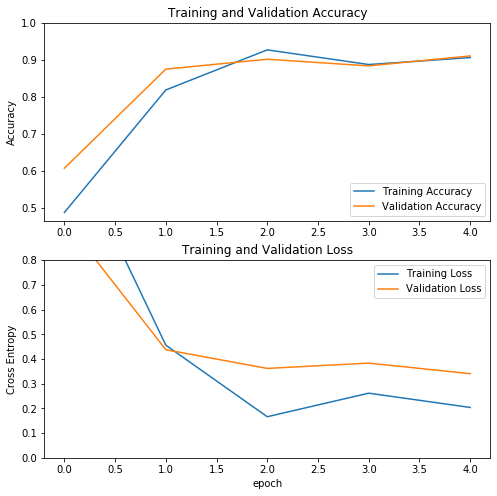

In [115]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

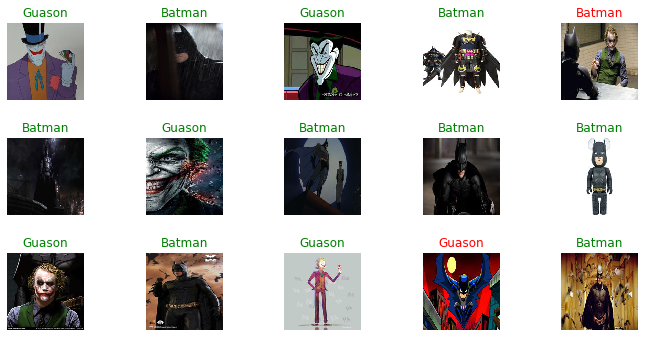

In [119]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [122]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [123]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [132]:
initial_epochs = 10
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=10,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 10 steps, validate for 4 steps
Epoch 10/20
10/10 [==============================] - 75s 8s/step - loss: 0.3835 - accuracy: 0.8489 - val_loss: 76.5158 - val_accuracy: 0.6161
Epoch 11/20
10/10 [==============================] - 77s 8s/step - loss: 0.1700 - accuracy: 0.9344 - val_loss: 69.4118 - val_accuracy: 0.6875
Epoch 12/20
10/10 [==============================] - 77s 8s/step - loss: 0.1028 - accuracy: 0.9563 - val_loss: 39.7988 - val_accuracy: 0.8036
Epoch 13/20
10/10 [==============================] - 75s 8s/step - loss: 0.0582 - accuracy: 0.9807 - val_loss: 65.6399 - val_accuracy: 0.4732
Epoch 14/20
10/10 [==============================] - 75s 8s/step - loss: 0.1518 - accuracy: 0.9807 - val_loss: 20.6954 - val_accuracy: 0.5000
Epoch 15/20
10/10 [==============================] - 75s 8s/step - loss: 0.1238 - accuracy: 0.9678 - val_loss: 3.8726 - val_accuracy: 0.8393
Epoch 16/20
10/10 [==============================] - 77s 8s/step - loss: 0.0675 - accuracy: 0.9750 - val_los

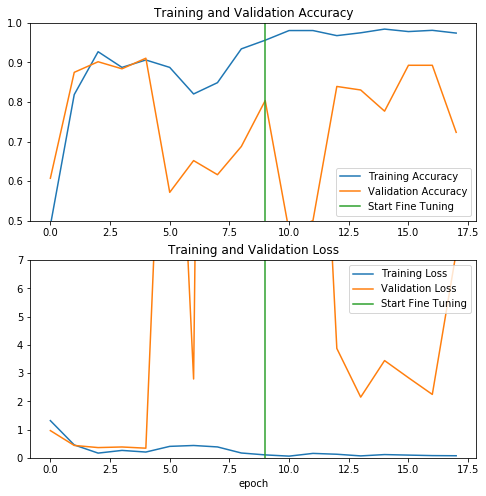

In [134]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

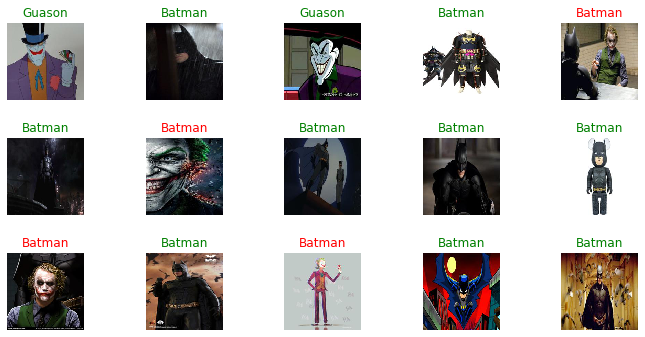

In [135]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)